In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit


df = pd.read_csv("processed_data.csv")


# Creating a new feature difference in motor_temperature 
df['temp_diff'] = df['motor_temperature'].diff()

# Creating a rolling standard deviation for the 'torque' column 
df['torque_std_5'] = df['torque'].rolling(window=5).std()


df.bfill(inplace=True)

df.reset_index(drop=True, inplace=True)

print("Data with New Features:")
print(df.head())


# Saving the Reprocessed Data to a New CSV File
df.to_csv("processed_data_v2.csv", index=False)
print("Reprocessed data saved as 'processed_data_v2.csv'")


target_col = "motor_temperature"
X = df.drop(target_col, axis=1).values 
y = df[target_col].values

tscv = TimeSeriesSplit(n_splits=5)
fold = 1
for train_index, val_index in tscv.split(X):
    print(f"Fold {fold}:")
    print("  Train indices:", train_index[0], "to", train_index[-1])
    print("  Validation indices:", val_index[0], "to", val_index[-1])
    fold += 1


Data with New Features:
        u_q    coolant  stator_winding       u_d  stator_tooth  motor_speed  \
0 -0.653148  18.941711       19.074583  0.238890     18.292524     0.001337   
1 -0.758392  18.960861       19.082499  0.395099     18.294041     0.001422   
2 -0.727128  18.973545       19.085533  0.546623     18.291964     0.000577   
3 -0.874307  18.987812       19.076025  0.578944     18.287233    -0.001248   
4 -0.766984  18.998701       19.078054  0.689281     18.286503     0.001853   

        i_d       i_q  motor_temperature  stator_yoke    ambient    torque  \
0 -1.005647  0.554211          24.576578    18.321936  19.850630  0.670015   
1 -1.288384  0.706370          24.574949    18.314655  19.850628  0.752035   
2 -1.490530  0.817339          24.567080    18.306925  19.850626  0.910541   
3 -1.634464  0.898013          24.553242    18.301733  19.850624  0.924010   
4 -1.739208  0.952030          24.534229    18.305416  19.850622  1.033538   

   profile_id  motor_temperature

Training data shape: (931559, 10, 18)
Validation data shape: (199621, 10, 18)
Test data shape: (199620, 10, 18)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,561 (25.63 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29086/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 1085.3936

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 962us/step - loss: 1084.8054 - val_loss: 15.5825 - learning_rate: 3.0000e-04
Epoch 2/100
29092/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 99.4620

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 960us/step - loss: 99.4582 - val_loss: 13.3021 - learning_rate: 3.0000e-04
Epoch 3/100
29089/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 80.0003

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 955us/step - loss: 79.9971 - val_loss: 4.9537 - learning_rate: 3.0000e-04
Epoch 4/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 952us/step - loss: 66.7422 - val_loss: 7.6880 - learning_rate: 3.0000e-04
Epoch 5/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 975us/step - loss: 57.1664 - val_loss: 6.4203 - learning_rate: 3.0000e-04
Epoch 6/100
29068/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 48.9044

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 975us/step - loss: 48.9020 - val_loss: 2.4143 - learning_rate: 3.0000e-04
Epoch 7/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 968us/step - loss: 43.7931 - val_loss: 2.5457 - learning_rate: 3.0000e-04
Epoch 8/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 970us/step - loss: 39.5053 - val_loss: 5.6361 - learning_rate: 3.0000e-04
Epoch 9/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 28s 973us/step - loss: 36.3390 - val_loss: 3.2108 - learning_rate: 3.0000e-04
Epoch 10/100
29071/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 35.3457

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 995us/step - loss: 35.3453 - val_loss: 1.9530 - learning_rate: 3.0000e-04
Epoch 11/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 984us/step - loss: 33.3015 - val_loss: 2.9825 - learning_rate: 3.0000e-04
Epoch 12/100
29083/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 32.4378

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 987us/step - loss: 32.4376 - val_loss: 1.3726 - learning_rate: 3.0000e-04
Epoch 13/100
29082/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 31.9105

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 987us/step - loss: 31.9104 - val_loss: 1.0864 - learning_rate: 3.0000e-04
Epoch 14/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 982us/step - loss: 31.7593 - val_loss: 9.3646 - learning_rate: 3.0000e-04
Epoch 15/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 991us/step - loss: 31.6725 - val_loss: 1.9864 - learning_rate: 3.0000e-04
Epoch 16/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 986us/step - loss: 31.2445 - val_loss: 1.9426 - learning_rate: 3.0000e-04
Epoch 17/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 31.5455 - val_loss: 2.4523 - learning_rate: 3.0000e-04
Epoch 18/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 998us/step - loss: 28.8507 - val_loss: 1.8050 - learning_rate: 1.5000e-04
Epoch 19/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 28.4607 - val_loss: 3.6487 - learning_rate: 1.5000e-04
Epoch 20/100
29059/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 28.2642

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 995us/step - loss: 28.2640 - val_loss: 0.7068 - learning_rate: 1.5000e-04
Epoch 21/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 28.1379 - val_loss: 1.3976 - learning_rate: 1.5000e-04
Epoch 22/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 28.1071 - val_loss: 1.4676 - learning_rate: 1.5000e-04
Epoch 23/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 27.8468 - val_loss: 1.9982 - learning_rate: 1.5000e-04
Epoch 24/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 27.8698 - val_loss: 1.5601 - learning_rate: 1.5000e-04
Epoch 25/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 999us/step - loss: 26.6033 - val_loss: 1.8906 - learning_rate: 7.5000e-05
Epoch 26/100
29089/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 26.4219

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 26.4220 - val_loss: 0.6886 - learning_rate: 7.5000e-05
Epoch 27/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 26.2707 - val_loss: 1.6742 - learning_rate: 7.5000e-05
Epoch 28/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 26.1800 - val_loss: 0.7754 - learning_rate: 7.5000e-05
Epoch 29/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 26.1905 - val_loss: 1.2878 - learning_rate: 7.5000e-05
Epoch 30/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 997us/step - loss: 26.2523 - val_loss: 0.8508 - learning_rate: 7.5000e-05
Epoch 31/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 25.4325 - val_loss: 0.7660 - learning_rate: 3.7500e-05
Epoch 32/100
29108/29112 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 25.5182

29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 25.5182 - val_loss: 0.6708 - learning_rate: 3.7500e-05
Epoch 33/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 25.4752 - val_loss: 1.2344 - learning_rate: 3.7500e-05
Epoch 34/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 25.5370 - val_loss: 1.3850 - learning_rate: 3.7500e-05
Epoch 35/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 25.4454 - val_loss: 0.7687 - learning_rate: 3.7500e-05
Epoch 36/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 25.3371 - val_loss: 0.8218 - learning_rate: 3.7500e-05
Epoch 37/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 25.0244 - val_loss: 0.8964 - learning_rate: 1.8750e-05
Epoch 38/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 25.0293 - val_loss: 1.0486 - learning_rate: 1.8750e-05
Epoch 39/100
29112/29112 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 25.0407 - val_loss: 0.9160 - learning_rate: 1.8750e-05
Epoch 40/100
29112/29112 ━━━━━━━━━━━━

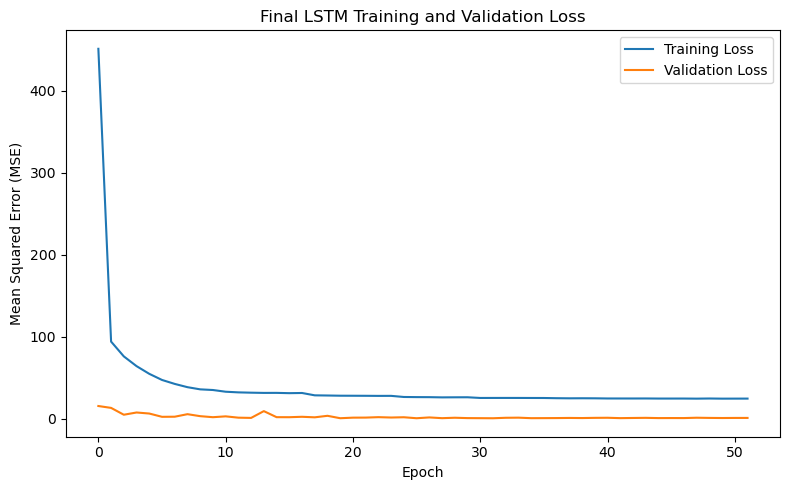

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


df = pd.read_csv("processed_data_v2.csv")

# Separate features and target variable
target_col = "motor_temperature"
feature_cols = [col for col in df.columns if col != target_col]
X = df[feature_cols].values
y = df[target_col].values


# Creating a Time-Series Sequences
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(window_size, len(X)):
        X_seq.append(X[i-window_size:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

window_size = 10  
X_seq, y_seq = create_sequences(X, y, window_size)



# Spliting Data Chronologically
n = len(X_seq)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

X_train_seq = X_seq[:train_end]
y_train_seq = y_seq[:train_end]

X_val_seq = X_seq[train_end:val_end]
y_val_seq = y_seq[train_end:val_end]

X_test_seq = X_seq[val_end:]
y_test_seq = y_seq[val_end:]

print("Training data shape:", X_train_seq.shape)
print("Validation data shape:", X_val_seq.shape)
print("Test data shape:", X_test_seq.shape)


# LSTM Model 3
model = Sequential()
# Single LSTM layer with 32 units
model.add(LSTM(32, input_shape=(window_size, X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.4))

model.add(Dense(1))

# Used Adam optimizer with a lower learning rate for more stable training updates
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mse')

model.summary()


early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model_final.h5", monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)


# Training the LSTM Model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_seq, y_val_seq),
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)


test_loss = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print("Test Loss (MSE):", test_loss)


#Plotting
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Final LSTM Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.tight_layout()
plt.show()


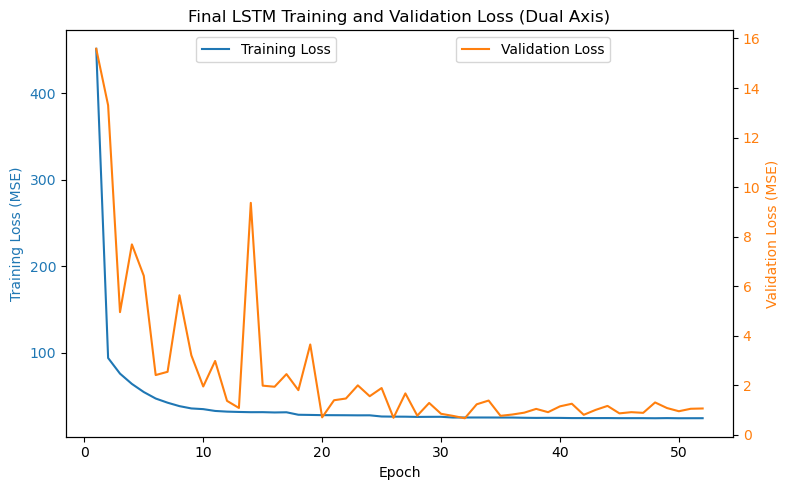

In [6]:
import matplotlib.pyplot as plt

def plot_dual_axis_loss(history):

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_loss) + 1)

    fig, ax1 = plt.subplots(figsize=(8, 5))


    color1 = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Training Loss (MSE)', color=color1)
    ax1.plot(epochs, train_loss, label='Training Loss', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:orange'
    ax2.set_ylabel('Validation Loss (MSE)', color=color2)
    ax2.plot(epochs, val_loss, label='Validation Loss', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    ax1.legend(loc='upper center', bbox_to_anchor=(0.3, 1.0))
    ax2.legend(loc='upper center', bbox_to_anchor=(0.7, 1.0))

    plt.title("Final LSTM Training and Validation Loss (Dual Axis)")
    plt.tight_layout()
    plt.show()

plot_dual_axis_loss(history)
